In [3]:
# homework 1.1
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Sig_Eqs = pd.read_csv("earthquakes-2025-10-29_21-03-29_+0800.tsv",sep="\t")
met1 = Sig_Eqs[["Year","Country","Total Deaths"]][ Sig_Eqs["Total Deaths"].notna()]
city_total_deaths = met1.groupby("Country")["Total Deaths"].sum().sort_values(ascending = False).reset_index()
a = city_total_deaths.head(10)["Total Deaths"].sum()
print("自公元前 2150 年以来每个国家因地震造成的死亡总人数分别为：",city_total_deaths)
print("死亡人数最多的前十个国家为：","\n",city_total_deaths.head(10)["Country"],"\n","十个国家的死亡总人数为：",a)

自公元前 2150 年以来每个国家因地震造成的死亡总人数分别为：          Country  Total Deaths
0          CHINA     2106524.0
1         TURKEY     1008863.0
2           IRAN      761654.0
3          SYRIA      487726.0
4          ITALY      423280.0
..           ...           ...
114   KAZAKHSTAN           2.0
115  NETHERLANDS           1.0
116        KENYA           1.0
117        TONGA           1.0
118     THAILAND           1.0

[119 rows x 2 columns]
死亡人数最多的前十个国家为： 
 0         CHINA
1        TURKEY
2          IRAN
3         SYRIA
4         ITALY
5         HAITI
6         JAPAN
7    AZERBAIJAN
8     INDONESIA
9       ARMENIA
Name: Country, dtype: object 
 十个国家的死亡总人数为： 6222361.0


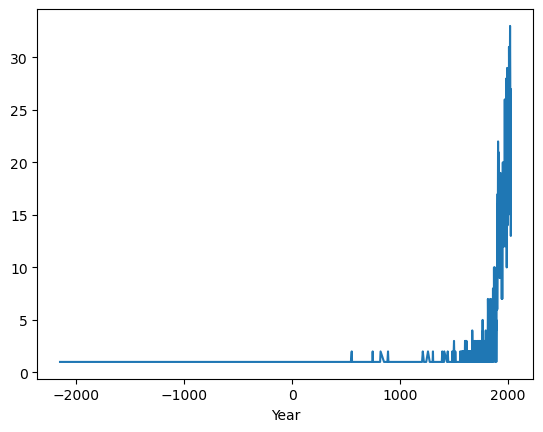

Year
-2150.0     1
-2000.0     1
-1250.0     1
-1050.0     1
-479.0      1
           ..
 2021.0    23
 2022.0    21
 2023.0    27
 2024.0    13
 2025.0    18
Name: Year, Length: 552, dtype: int64

In [98]:
# homework 1.2
met2 = Sig_Eqs[["Year","Mag"]][ Sig_Eqs["Mag"].notna()]
met2.loc[met2["Mag"]>6].groupby("Year")["Year"].count().plot(kind = "line")
plt.show()
met2.loc[met2["Mag"]>6].groupby("Year")["Year"].count()
'''
从绘制的图来看全球震级大于6的地震总数在2000年前后开始显著增长，
原因可能是地震的检测技术更好了，相比于以前，可以检测到跟多的地震。
'''

In [19]:
# homework 1.3
def CountEq_LargestEq(country):

    cols = ["Year", "Mo", "Dy", "Mag", "Country"]
    sub = Sig_Eqs.loc[Sig_Eqs["Country"] == country, cols].copy()

    total_eq = sub.shape[0]
    if total_eq == 0:                     
        return 0, 0, 0, 0

    if sub["Mag"].isna().all():
        row = sub.iloc[0]
    else:
        row = sub.loc[sub["Mag"].idxmax()]

    year = 0
    month = 0
    day = 0
    

    if str(row["Year"]) != "nan" and row["Year"] != "":
        year = int(row["Year"])
    

    if str(row["Mo"]) != "nan" and row["Mo"] != "":
        month = int(row["Mo"])
    

    if str(row["Dy"]) != "nan" and row["Dy"] != "":
        day = int(row["Dy"])



    return total_eq, year, month, day

res = []
for c in Sig_Eqs["Country"].unique():
    cnt, y, m, d = CountEq_LargestEq(c)
    res.append({"Country": c, "TotalEq": cnt, "Year": y, "Month": m, "Day": d})

res_df = (pd.DataFrame(res).sort_values("TotalEq", ascending=False).reset_index(drop=True))

print(res_df)


        Country  TotalEq  Year  Month  Day
0         CHINA      623  1668      7   25
1         JAPAN      424  2011      3   11
2     INDONESIA      421  2004     12   26
3          IRAN      388   856     12   22
4        TURKEY      358  1939     12   26
..          ...      ...   ...    ...  ...
154     BURUNDI        1  2004      2   24
155      ZAMBIA        1  2017      2   24
156  MADAGASCAR        1  2017      1   11
157     COMOROS        1  2018      5   15
158         NaN        0     0      0    0

[159 rows x 5 columns]


C:\Users\86131\AppData\Local\Temp\ipykernel_33492\1585984683.py:6: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2281305.csv')


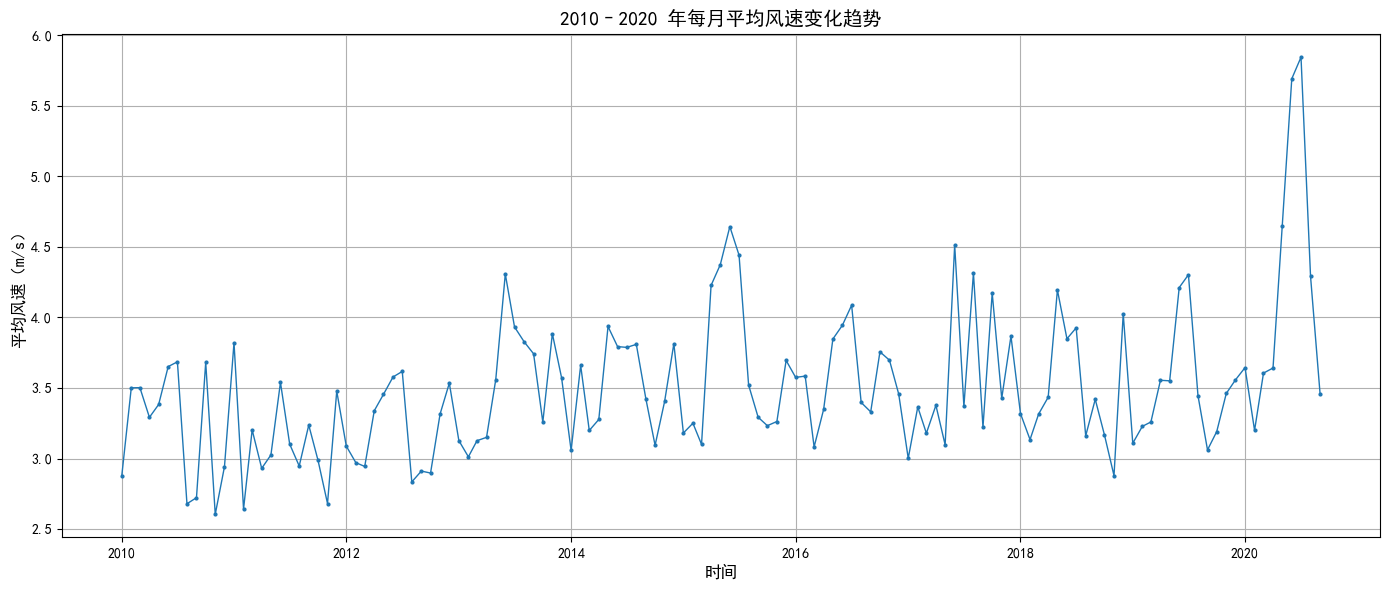

In [27]:
# homework2
import pandas as pd
import matplotlib.pyplot as plt
'''
使用的风速数据为类型为N和C以及风速质量为1的数据，因为这种风速数据是更加可靠的。
'''
df = pd.read_csv('2281305.csv')

wnd = df['WND'].str.extract(r'(\d{3}),(\d),([A-Z]),(\d{4}),(\d)')
wnd.columns = ['wind_angle', 'wind_quality', 'wind_type', 'wind_speed', 'speed_quality']

wnd = wnd[
    (wnd['wind_type'].isin(['N', 'C'])) &
    (wnd['speed_quality'] == '1')
]

wnd['wind_speed'] = pd.to_numeric(wnd['wind_speed'], errors='coerce')
wnd = wnd[wnd['wind_speed'] != 9999] 
wnd['wind_speed_ms'] = wnd['wind_speed'] / 10.0

df['wind_speed_ms'] = wnd['wind_speed_ms']
df = df.dropna(subset=['wind_speed_ms'])

df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month

df = df[(df['year'] >= 2010) & (df['year'] <= 2020)]

monthly_avg = df.groupby(['year', 'month'])['wind_speed_ms'].mean().reset_index()

monthly_avg['date'] = pd.to_datetime(monthly_avg[['year', 'month']].assign(day=1))

plt.figure(figsize=(14, 6))
plt.plot(monthly_avg['date'], monthly_avg['wind_speed_ms'], marker='o', linewidth=1, markersize=2)
plt.title('2010–2020 年每月平均风速变化趋势', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('平均风速（m/s）', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

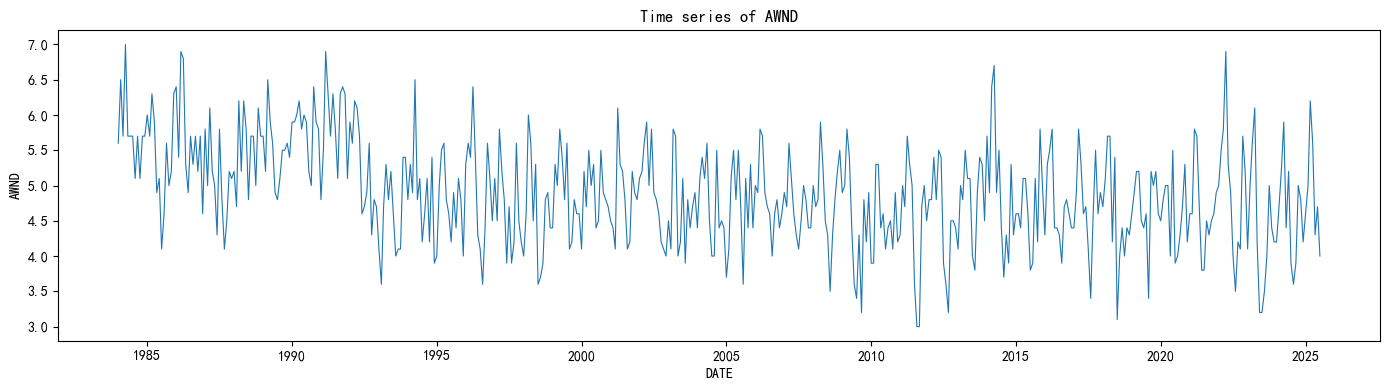

AWND five summary statistics:
Mean:   4.898
Median: 4.900
Std:    0.731
Min:    3.000
Max:    7.000


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
'''
数据来源为 National Centers for Environmental Information (NCEI)中的CONCORDIA ASOS, KS US (USW00013984.csv)
'''
df = pd.read_csv("USW00013984.csv")
met5 = df[["DATE","AWND"]][df["AWND"].notna()]

met5["DATE"] = pd.to_datetime(met5["DATE"], errors="coerce")
met5 = met5.sort_values("DATE").reset_index(drop=True)
plt.figure(figsize=(14,4))
plt.plot(met5["DATE"], met5["AWND"], color="tab:blue", linewidth=0.8)
plt.xlabel("DATE")
plt.ylabel("AWND")
plt.title("Time series of AWND")
plt.tight_layout()
plt.show()

# 计算五项统计量
mean_val = met5["AWND"].mean()
median_val = met5["AWND"].median()
std_val = met5["AWND"].std()
min_val = met5["AWND"].min()
max_val = met5["AWND"].max()

print("AWND five summary statistics:")
print(f"Mean:   {mean_val:.3f}")
print(f"Median: {median_val:.3f}")
print(f"Std:    {std_val:.3f}")
print(f"Min:    {min_val:.3f}")
print(f"Max:    {max_val:.3f}")
'''
均值和中位数几乎相等，说明 AWND 分布对称性较好，
没有明显偏斜。标准差为 0.731，说明日均风速总体稳定。
'''

